In [12]:
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from experiment import label_some_data, prepare_dataset
from ipl.models import (
    RandomIterativePseudoLabeler, 
    TopConfidenceIterativePseudoLabeler,
    ConfidenceIntervalIterativePseudoLabeler,
    HybridIterativePseudoLabeler
)

In [13]:
n_trees = 500

In [29]:
# Load all the data
X, y = prepare_dataset(classes=[1, 2])
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2767.0,52.0,12.0,408.0,33.0,60.0,226.0,215.0,121.0,730.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987.0,151.0,26.0,342.0,61.0,1682.0,242.0,229.0,100.0,1256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3056.0,171.0,31.0,470.0,259.0,2726.0,224.0,236.0,120.0,1608.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3007.0,343.0,10.0,108.0,8.0,2674.0,200.0,225.0,163.0,2144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3246.0,45.0,8.0,134.0,19.0,1519.0,222.0,223.0,136.0,2766.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y.head()

0    2
1    2
2    1
4    1
5    1
Name: Cover_Type, dtype: int32

In [31]:
X_master_train, X_master_test, y_master_train, y_master_test = train_test_split(X, y)
print(f"Loaded dataset ({X.shape=}, {y.nunique()=}).")

# "Optimal" : if we had all of the data labeled, how well could we do ?
full_model = CatBoostClassifier(n_estimators=n_trees)
full_model.fit(X_master_train, y_master_train)
full_accuracy = accuracy_score(y_master_test, full_model.predict(X_master_test))
print(f"Trained and evaluated full model ({full_accuracy=:.4f}).")

Loaded dataset (X.shape=(495141, 54), y.nunique()=2).
Learning rate set to 0.243376
0:	learn: 0.6081684	total: 23ms	remaining: 11.5s
1:	learn: 0.5597336	total: 41.9ms	remaining: 10.4s
2:	learn: 0.5272408	total: 65.4ms	remaining: 10.8s
3:	learn: 0.5095425	total: 89ms	remaining: 11s
4:	learn: 0.4962182	total: 116ms	remaining: 11.5s
5:	learn: 0.4863022	total: 147ms	remaining: 12.1s
6:	learn: 0.4775011	total: 178ms	remaining: 12.6s
7:	learn: 0.4687238	total: 205ms	remaining: 12.6s
8:	learn: 0.4641607	total: 234ms	remaining: 12.7s
9:	learn: 0.4585808	total: 262ms	remaining: 12.8s
10:	learn: 0.4533544	total: 287ms	remaining: 12.7s
11:	learn: 0.4490271	total: 315ms	remaining: 12.8s
12:	learn: 0.4450034	total: 344ms	remaining: 12.9s
13:	learn: 0.4423408	total: 369ms	remaining: 12.8s
14:	learn: 0.4398697	total: 397ms	remaining: 12.8s
15:	learn: 0.4369732	total: 420ms	remaining: 12.7s
16:	learn: 0.4324113	total: 442ms	remaining: 12.6s
17:	learn: 0.4300300	total: 464ms	remaining: 12.4s
18:	learn:

In [32]:
X_master_train.shape[0] - 500

370855

In [33]:
# Instead, assume we only have a small quantity of the data labeled
X_known, X_unknown, y_known, y_unknown = label_some_data(
    X_master_train, y_master_train, n_labeled=500
)

# Using only this labeled data, how well would we do ?
labeled_model = CatBoostClassifier(n_estimators=n_trees)
labeled_model.fit(X_known, y_known)
labeled_accuracy = accuracy_score(y_unknown, labeled_model.predict(X_unknown))
print(f"Trained and evaluated labeled-only model ({labeled_accuracy=:.4f}).")


Learning rate set to 0.014469
0:	learn: 0.6883657	total: 1ms	remaining: 502ms
1:	learn: 0.6827206	total: 2.08ms	remaining: 517ms
2:	learn: 0.6770245	total: 3.12ms	remaining: 517ms
3:	learn: 0.6724487	total: 4.07ms	remaining: 504ms
4:	learn: 0.6675718	total: 5.37ms	remaining: 532ms
5:	learn: 0.6631134	total: 6.34ms	remaining: 522ms
6:	learn: 0.6585080	total: 7.44ms	remaining: 524ms
7:	learn: 0.6543375	total: 8.38ms	remaining: 515ms
8:	learn: 0.6508469	total: 9.52ms	remaining: 519ms
9:	learn: 0.6465374	total: 10.5ms	remaining: 514ms
10:	learn: 0.6422543	total: 11.8ms	remaining: 524ms
11:	learn: 0.6379095	total: 12.8ms	remaining: 521ms
12:	learn: 0.6342952	total: 13.8ms	remaining: 515ms
13:	learn: 0.6306173	total: 14.6ms	remaining: 508ms
14:	learn: 0.6255858	total: 15.7ms	remaining: 506ms
15:	learn: 0.6214001	total: 16.6ms	remaining: 503ms
16:	learn: 0.6171133	total: 17.6ms	remaining: 499ms
17:	learn: 0.6132392	total: 18.4ms	remaining: 494ms
18:	learn: 0.6088549	total: 19.3ms	remaining: 4

100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


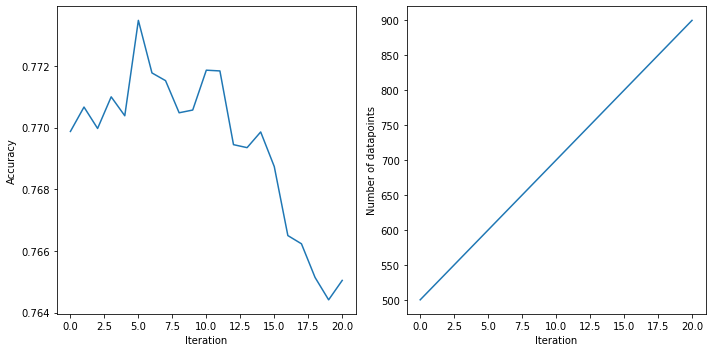

In [34]:
n_iterations = 20
n_new_points = 20

random_model = RandomIterativePseudoLabeler(
    X_known=X_known,
    y_known=y_known,
    X_unknown=X_unknown,
    X_master_test=X_master_test,
    y_master_test=y_master_test,
    model_kwargs={"n_estimators": n_trees, "verbose": 0},
)
random_accuracy, n_data = random_model.fit(
    n_iterations=n_iterations, n_new_points=n_new_points
)

random_model.plot_results(random_accuracy, n_data)

100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


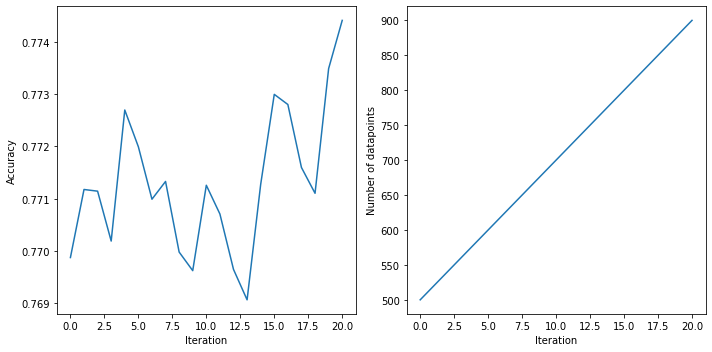

In [35]:
top_conf_model = TopConfidenceIterativePseudoLabeler(
    X_known=X_known,
    y_known=y_known,
    X_unknown=X_unknown,
    X_master_test=X_master_test,
    y_master_test=y_master_test,
    model_kwargs={"n_estimators": n_trees, "verbose": 0},
)
top_conf_accuracy, n_data = top_conf_model.fit(
    n_iterations=n_iterations, n_new_points=n_new_points
)

top_conf_model.plot_results(top_conf_accuracy, n_data)

100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


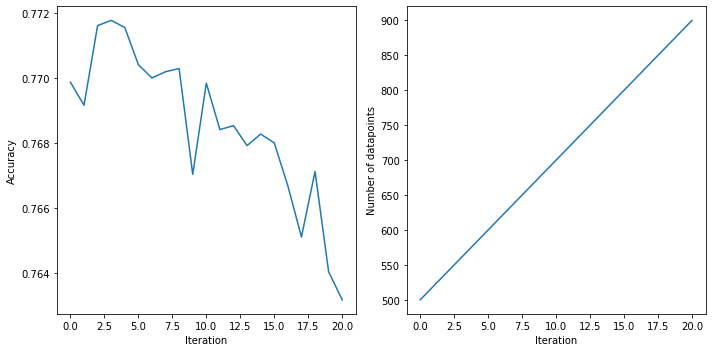

In [36]:
conf_int_model = ConfidenceIntervalIterativePseudoLabeler(
    X_known=X_known,
    y_known=y_known,
    X_unknown=X_unknown,
    X_master_test=X_master_test,
    y_master_test=y_master_test,
    model_kwargs={"n_estimators": n_trees, "verbose": 0},
)
conf_int_accuracy, n_data = conf_int_model.fit(
    n_iterations=n_iterations,
    n_new_points=n_new_points, 
    lower=0.8,
    upper=0.9
)

conf_int_model.plot_results(conf_int_accuracy, n_data)

100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


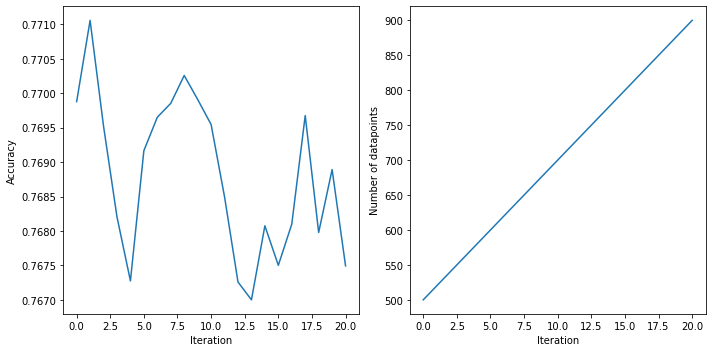

In [37]:
hybrid_model = HybridIterativePseudoLabeler(
    X_known=X_known,
    y_known=y_known,
    X_unknown=X_unknown,
    X_master_test=X_master_test,
    y_master_test=y_master_test,
    model_kwargs={"n_estimators": n_trees, "verbose": 0},
)
hybrid_accuracy, n_data = hybrid_model.fit(
    n_iterations=n_iterations,
    n_new_points=n_new_points, 
    lower=0.8,
    upper=0.9,
    frac_confidence=0.33,
    frac_interval=0.33
)

hybrid_model.plot_results(hybrid_accuracy, n_data)

In [38]:
X_unknown.shape

(370855, 54)

100%|██████████| 1/1 [00:04<00:00,  4.83s/it]


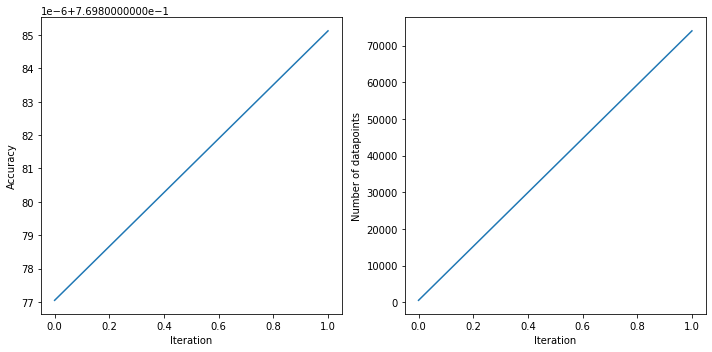

In [45]:
n_iterations = 1
n_new_points = 100000

hybrid_model = HybridIterativePseudoLabeler(
    X_known=X_known,
    y_known=y_known,
    X_unknown=X_unknown,
    X_master_test=X_master_test,
    y_master_test=y_master_test,
    model_kwargs={"n_estimators": n_trees, "verbose": 0},
)
hybrid_accuracy, n_data = hybrid_model.fit(
    n_iterations=n_iterations,
    n_new_points=n_new_points, 
    lower=0.8,
    upper=0.9,
    frac_confidence=0.33,
    frac_interval=0.33
)

hybrid_model.plot_results(hybrid_accuracy, n_data)

In [46]:
hybrid_accuracy

[0.7698770458694845, 0.7698851243274684]